# ===========================================================
# Relationship of network-based metrics with influence on members
# ===========================================================

###### Goals:
1- Compute other people's influence on every member

2- Compute different network-based metrics

3- Compute causality or correlation of them two

#### Last update: 09 Dec 2019

# Imports

In [1]:
from __future__ import division, print_function, absolute_import, unicode_literals

import scipy as sp
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import sys
import networkx as nx
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv1D, LSTM, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras import regularizers

from scipy.stats import pearsonr
from statsmodels.tsa.stattools import grangercausalitytests

sys.path.insert(0, '../src/')
%matplotlib inline

import utils
from mytimer import Timer

/home/omid/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/omid/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Parameters

In [2]:
team_logs_fpath = '/home/omid/Datasets/Jeopardy/Teams_logs.pk'
team_networks_fpath = '/home/omid/Datasets/Jeopardy/Teams_networks.pk'

# Helper functions

In [3]:
def get_eigvec_of_laplacian(A: np.matrix) -> np.matrix:
#     D = np.diag(np.array(np.sum(A, axis=0))[0])
#     L = D - A
#     return np.matrix(np.linalg.eig(L)[1])
    n, m = A.shape
    diags = A.sum(axis=1).flatten()
    D = sp.sparse.spdiags(diags, [0], m, n, format='csr')
    L = D - A
    with sp.errstate(divide='ignore'):
        diags_sqrt = 1.0/sp.sqrt(diags)
    diags_sqrt[sp.isinf(diags_sqrt)] = 0
    DH = sp.sparse.spdiags(diags_sqrt, [0], m, n, format='csr')
    DH = DH.todense()
    normalized_L = DH.dot(L.dot(DH))
    return normalized_L

In [4]:
def get_normalized_influence_on_others(A: np.ndarray, index: int) -> float:
    A = np.array(A)
    return sum(
        A[[i for i in range(len(A))
           if i != index], index]) / 100

# Loading the data

In [5]:
teams_logs = utils.load_it(team_logs_fpath)
print(len(teams_logs))

49


In [6]:
teams_networks = utils.load_it(team_networks_fpath)
print(len(teams_networks))

46


# Distribution of members' received influence from others

In [96]:
all_influences_on_others = []

influences_on_others = {}  # How influential this person is in every period (5 questions).
for team_id, nets in teams_networks.items():
    team_log = teams_logs[team_id]
    influences_on_others[team_id] = []
    for influence_matrix in team_log.member_influences:
        infl = {}
        for index, member in enumerate(team_log.members):
            influence_on_others = get_normalized_influence_on_others(
                influence_matrix, index)
            all_influences_on_others.append(influence_on_others)
            infl[member] = influence_on_others
        influences_on_others[team_id].append(infl)

Min: 0.1, Max: 1.85, Median: 0.7, Avg: 0.7048746312684365, Std: 0.18782303281896076.


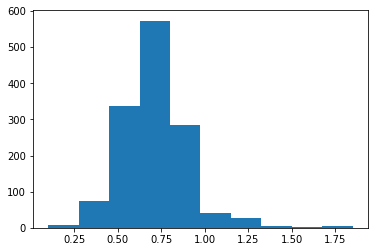

In [9]:
plt.hist(all_influences_on_others)
print('Min: {}, Max: {}, Median: {}, Avg: {}, Std: {}.'.format(
    np.min(all_influences_on_others),
    np.max(all_influences_on_others),
    np.median(all_influences_on_others),
    np.mean(all_influences_on_others),
    np.std(all_influences_on_others)))

# Relationship with network-based features

reply_duration
r-val: 0.01898114138098264
p-val: 0.5105406013884448 	


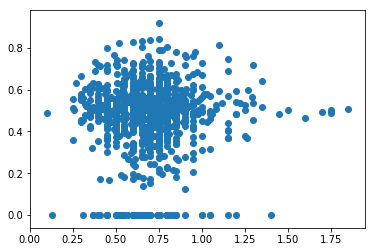


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1100  , p=0.2923  , df_denom=1200, df_num=1
ssr based chi2 test:   chi2=1.1127  , p=0.2915  , df=1
likelihood ratio test: chi2=1.1122  , p=0.2916  , df=1
parameter F test:         F=1.1100  , p=0.2923  , df_denom=1200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2412  , p=0.0395  , df_denom=1197, df_num=2
ssr based chi2 test:   chi2=6.5095  , p=0.0386  , df=2
likelihood ratio test: chi2=6.4920  , p=0.0389  , df=2
parameter F test:         F=3.2412  , p=0.0395  , df_denom=1197, df_num=2




emotion_arousal
r-val: 0.011190569490029311
p-val: 0.7190215517682261 	


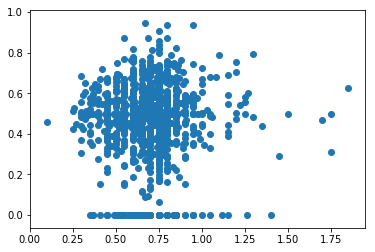


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3979  , p=0.5283  , df_denom=1032, df_num=1
ssr based chi2 test:   chi2=0.3990  , p=0.5276  , df=1
likelihood ratio test: chi2=0.3989  , p=0.5276  , df=1
parameter F test:         F=0.3979  , p=0.5283  , df_denom=1032, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2896  , p=0.7486  , df_denom=1029, df_num=2
ssr based chi2 test:   chi2=0.5821  , p=0.7475  , df=2
likelihood ratio test: chi2=0.5819  , p=0.7475  , df=2
parameter F test:         F=0.2896  , p=0.7486  , df_denom=1029, df_num=2




emotion_dominance
r-val: 0.017439524953673718
p-val: 0.5750087672602524 	


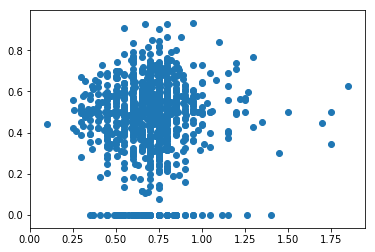


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4696  , p=0.4933  , df_denom=1032, df_num=1
ssr based chi2 test:   chi2=0.4709  , p=0.4926  , df=1
likelihood ratio test: chi2=0.4708  , p=0.4926  , df=1
parameter F test:         F=0.4696  , p=0.4933  , df_denom=1032, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3322  , p=0.7174  , df_denom=1029, df_num=2
ssr based chi2 test:   chi2=0.6675  , p=0.7162  , df=2
likelihood ratio test: chi2=0.6673  , p=0.7163  , df=2
parameter F test:         F=0.3322  , p=0.7174  , df_denom=1029, df_num=2




emotion_valence
r-val: 0.017783860652631076
p-val: 0.5674828946814785 	


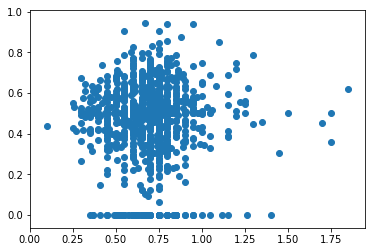


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3331  , p=0.5640  , df_denom=1032, df_num=1
ssr based chi2 test:   chi2=0.3341  , p=0.5633  , df=1
likelihood ratio test: chi2=0.3340  , p=0.5633  , df=1
parameter F test:         F=0.3331  , p=0.5640  , df_denom=1032, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2618  , p=0.7697  , df_denom=1029, df_num=2
ssr based chi2 test:   chi2=0.5262  , p=0.7687  , df=2
likelihood ratio test: chi2=0.5261  , p=0.7687  , df=2
parameter F test:         F=0.2618  , p=0.7697  , df_denom=1029, df_num=2




sentiment
r-val: 0.048831173457941454
p-val: 0.2555435294438424 	


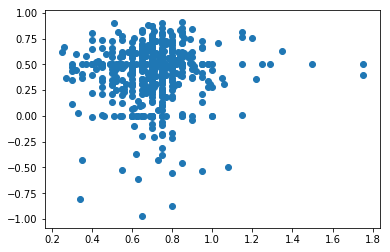


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7162  , p=0.0544  , df_denom=540, df_num=1
ssr based chi2 test:   chi2=3.7368  , p=0.0532  , df=1
likelihood ratio test: chi2=3.7240  , p=0.0536  , df=1
parameter F test:         F=3.7162  , p=0.0544  , df_denom=540, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5770  , p=0.2075  , df_denom=537, df_num=2
ssr based chi2 test:   chi2=3.1835  , p=0.2036  , df=2
likelihood ratio test: chi2=3.1742  , p=0.2045  , df=2
parameter F test:         F=1.5770  , p=0.2075  , df_denom=537, df_num=2






In [324]:
for network_type_str in ['reply_duration', 'emotion_arousal', 'emotion_dominance', 'emotion_valence', 'sentiment']:
    print(network_type_str)
    combined_influence_vector = []
    combined_metric_vector = []
    for team_id, influences in influences_on_others.items():
        nets = teams_networks[team_id]
#         if len(nets) < 5:
#             continue
        for i in range(len(nets)):
            net = nets[i]
            influence = influences[i]

#             metric = dict(net[network_type_str].out_degree(weight='weight'))

#             metric = dict(net[network_type_str].in_degree(weight='weight'))

            try:
                metric = nx.eigenvector_centrality(net[network_type_str], weight='weight')
            except:
                continue

            for member in metric.keys():
                combined_influence_vector.append(influence[member])
                combined_metric_vector.append(metric[member])
    combined_influence_vector = np.array(combined_influence_vector)
    combined_metric_vector = np.array(combined_metric_vector)

    # Correlation.
    rval, pval = pearsonr(combined_influence_vector, combined_metric_vector)
    significant = ''
    if pval < 0.05:
        significant = 'yay'
    print('r-val: {}\np-val: {} \t{}'.format(rval, pval, significant))
    
    plt.scatter(combined_influence_vector, combined_metric_vector)
    plt.show()
    
    # It tests whether the time series in the second column Granger causes the time series in the first column.
    grangercausalitytests(
        np.column_stack((combined_influence_vector, combined_metric_vector)),
        maxlag=2)
    
    print('=========================================================\n\n\n\n')